<h1><center>Sprint 4</center></h1>
<h2><center>Tasca 1</center></h2>

### Exercici 1

- _**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.**_

- __*Crea almenys una visualització per:*__

    - *Una variable categòrica (Districte o Barri)*
    - *Una variable numèrica (Preu)*
    - *Una variable numèrica i una categòrica (Districte i Preu)*
    - *Dues variables numèriques (Any o Trimestre i Preu)*
    - *Tres variables (Barri o Districte, Trimestre i Preu)*
    
### Exercici 2

- __*Exporta els gràfics com imatges o com HTML.*__

Nota: Els gràfics és guarden en la carpeta plots

In [1]:
# Packages
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import random
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint04/data/'
data_path = Path(data_path)
plot_path = 'D:/Sistema_Solar/Python/itacademy/itacademy-datascience/sprint04/plots/'
plot_path = Path(plot_path)

In [3]:
# Uploading csv
file_name = 'preu lloguer per trimestre i barri.csv'
file = data_path / file_name
rent_df = pd.read_csv(file)

In [4]:
rent_df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


---
**1. Les dades: districtes i barris**

Totes les dades són de l'any 2001, dividit en trimestres i comprenen els districtes de Barcelona i els seus barris.

In [5]:
print(rent_df['Codi_Districte'].unique()) # Els districtes s'identifiquen amb un codi o amb el seu nom.
print(rent_df['Nom_Districte'].unique())

[ 1  2  3  4  5  6  7  8  9 10]
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']


In [6]:
print(rent_df['Codi_Barri'].unique()) # Els barris també s'identifiquen amb un codi o amb el seu nom.
print(rent_df['Nom_Barri'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
['el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs' 'la Bordeta'
 'Sants - Badal' 'Sants' 'les Corts' 'la Maternitat i Sant Ramon'
 'Pedralbes' 'Vallvidrera, el Tibidabo i les Planes' 'Sarrià'
 'les Tres Torres' 'Sant Gervasi - la Bonanova' 'Sant Gervasi - Galvany'
 'el Putxet i el Farró' 'Vallcarca i els Penitents' 'el Coll' 'la Salut'
 'la Vila de Gràcia' "el Camp d'en Grassot i Gràcia Nova"
 'el Baix Guinardó' 'Can Baró' 'el Guinardó' "la Font d'en Fargues"
 'el Carmel' 'la Teixonera'

In [7]:
rent_df['Any'].unique()

array([2021], dtype=int64)

In [8]:
# Número barris per districte
num_barris = []
districtes = rent_df['Nom_Districte'].unique()

for districte in districtes:
    search = rent_df['Nom_Districte'] == districte
    num_barris.append(len(rent_df[search]['Nom_Barri'].unique()))

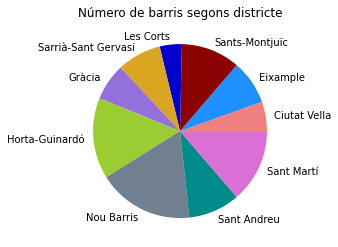

In [9]:
# Variable categórica

colors = ['lightcoral', 'dodgerblue', 'darkred', 'mediumblue', 'goldenrod', 'mediumpurple', 'yellowgreen',
          'slategrey', 'darkcyan', 'orchid']
plt.pie(num_barris, labels=districtes, colors=colors)
plt.title('Número de barris segons districte')

file = plot_path / str('Fig01_Pie_NumBarris.png')
plt.savefig(file, dpi=200, pad_inches=0.1, bbox_inches='tight')
plt.show()

Hi ha dos tipus de dades respecte el lloguer: 1) El lloguer mitjà mensual i 2) el lloguer mitjà per superfície per cada un dels barris de Barcelona.

In [10]:
rent_df['Lloguer_mitja'].unique() # Aquest camp diferencia el tipus de dada, entre lloguer pel pis complet o bé per m2.

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

Cal tenir en compte que algunes dades que són numériques es troben com a objectes a l'importar el csv, en concret el camp Preu, que convertim a float.

In [11]:
rent_df.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [12]:
rent_df['Preu'] = rent_df['Preu'].replace('--', np.nan)
rent_df['Preu'] = rent_df['Preu'].astype(float)

---
**2. La mitjana i la mediana del lloguer a Barcelona**

Cerquem la mitjana i la mediana, i algunes dades adicionals, per a tota Barcelona. El preu mensual mitjà és de 871.6€, mentre que la mediana és de 816.3€. De fet, el paràmetre skewness és clarament positiu. La mitjana és troba desviada cap a valors més alts degut als preus del barri amb els lloguers més cars.

El barri amb el lloguer més barat, amb el percentil 0, és 447.5€ i el més alt, 1816.5€

In [13]:
search = rent_df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'
rent_house_df = rent_df[search]

print('Dades per a tota Barcelona')
print('Lloguer mensual mitjà per habitatge: ' + str(round(rent_house_df['Preu'].mean(), 1)) + '€')
print('Mediana del lloguer mensual per habitatge: ' + str(round(rent_house_df['Preu'].median(), 1)) + '€')
      
per = [0, 10, 25, 50, 75, 90, 100]

for p in per:
    print('Percentil ' + str(p) + ': ' + str(round(np.nanpercentile(rent_house_df['Preu'], p), 1)) + '€')
    
stats.skew(rent_house_df['Preu'], nan_policy='omit').data

Dades per a tota Barcelona
Lloguer mensual mitjà per habitatge: 871.6€
Mediana del lloguer mensual per habitatge: 816.3€
Percentil 0: 447.5€
Percentil 10: 667.5€
Percentil 25: 742.5€
Percentil 50: 816.3€
Percentil 75: 934.5€
Percentil 90: 1197.2€
Percentil 100: 1816.5€


array(1.58516594)

Podem mostrar un histógrama dels preus mitjans en els diferents barris de Barcelona en els diferents quatrimestres. El preu més freqüent és d'entre 650€ a 700€ i la major part dels lloguers es troben entre els 600€ i els 1000€

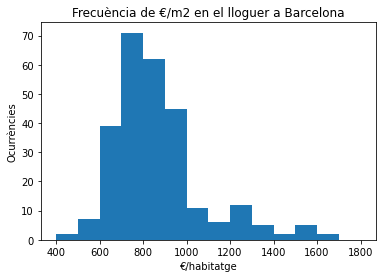

In [14]:
# Una variable numèrica

plt.hist(rent_house_df['Preu'], bins=np.arange(400, 1900, 100))
plt.xlabel('€/habitatge')
plt.ylabel('Ocurrències')
plt.title('Frecuència de €/m2 en el lloguer a Barcelona')

file = plot_path / str('Fig02_Hist_hab.png')
plt.savefig(file, dpi=200, pad_inches=0.1, bbox_inches='tight')

Per a les dades del preu per metre quadrat, la mitjana, de 12.7€ és prou similar a la mediana i el paràmetre skewness és pràcticament 0. En el histograma es pot veure clarament que la frecuència presenta una simetria major que en el cas anterior.

In [15]:
search = rent_df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'
rent_m2_df = rent_df[search]

print('Dades per a tota Barcelona')
print('Lloguer mensual mitjà per habitatge: ' + str(round(rent_m2_df['Preu'].mean(), 1)) + '€')
print('Mediana del lloguer mensual per habitatge: ' + str(round(rent_m2_df['Preu'].median(), 1)) + '€')
      
per = [0, 10, 25, 50, 75, 90, 100]

for p in per:
    print('Percentil ' + str(p) + ': ' + str(round(np.nanpercentile(rent_m2_df['Preu'], p), 1)) + '€')
    
stats.skew(rent_m2_df['Preu'], nan_policy='omit').data

Dades per a tota Barcelona
Lloguer mensual mitjà per habitatge: 12.7€
Mediana del lloguer mensual per habitatge: 12.8€
Percentil 0: 6.7€
Percentil 10: 10.9€
Percentil 25: 11.6€
Percentil 50: 12.8€
Percentil 75: 13.6€
Percentil 90: 15.0€
Percentil 100: 18.0€


array(0.09265361)

De  nou, amb un histograma trobem que el preu per m2 es troba entre 13€ i 14€ i que la major part dels lloguers es troben entre 11€ y 14€.

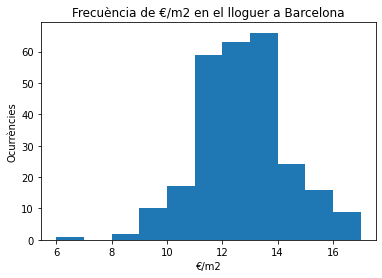

In [16]:


plt.hist(rent_m2_df['Preu'], bins=np.arange(6, 18, 1))
plt.xlabel('€/m2')
plt.ylabel('Ocurrències')
plt.title('Frecuència de €/m2 en el lloguer a Barcelona')
file = plot_path / str('Fig03_Hist_m2.png')
plt.savefig(file, dpi=200, pad_inches=0.1,
            bbox_inches='tight')

---
**3. Preu del lloguer per districtes**

Investiguem com són els preus per conjunt dels diferents districtes amb un boxplot que ens permetrà veure a també la dispersió en els preus. Si es gran, el districte pot presentar diferències notòries de classes socioeconòmiques en poc espai, cosa que pot afavorir tensions o conflictes.

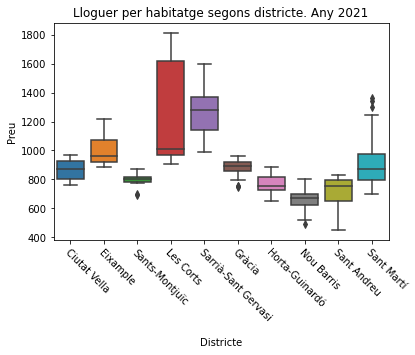

In [17]:
#Una variable númeroa i una categórica

fig, ax = plt.subplots()

sns.boxplot(data=rent_house_df, x='Nom_Districte', y="Preu", dodge=False)

ax.set_xticklabels(rent_house_df['Nom_Districte'].unique(), rotation='45')
ax.set_xlabel('Districte', rotation=0, fontsize=10, labelpad=15)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.title('Lloguer per habitatge segons districte. Any 2021')
file = plot_path / str('Fig04_Lloguer_Habitatge_Districtes')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

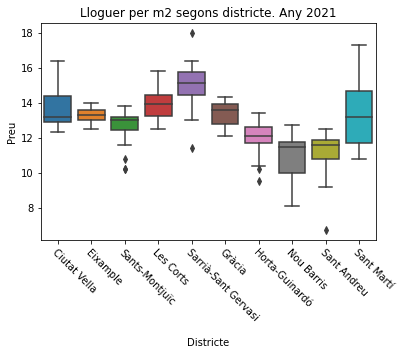

In [18]:
fig, ax = plt.subplots()

sns.boxplot(data=rent_m2_df, x='Nom_Districte', y="Preu", dodge=False)

ax.set_xticklabels(rent_m2_df['Nom_Districte'].unique(), rotation='45')
ax.set_xlabel('Districte', rotation=0, fontsize=10, labelpad=15)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.title('Lloguer per m2 segons districte. Any 2021')
file = plot_path / str('Fig05_Lloguer_m2_Districtes')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

Les Corts és un districte on les diferències, per habitatges, són molt gran però no pas si es mira per m2. Per tant, potser les diferències no són tan elevades com semblaria en un principi. Traurem la mitja per a tot l'any i mirarem les diferencies concretes entre els barris.

---
**4. El districte de Les Corts**

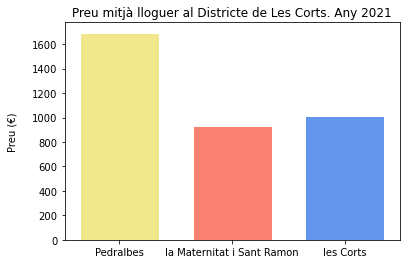

In [19]:
search = rent_house_df['Nom_Districte'] == 'Les Corts'
rent_house_lescorts_df = rent_house_df[search]

lescorts_preu = rent_house_lescorts_df.groupby('Nom_Barri').mean()['Preu'].values
lescorts_barri = rent_house_lescorts_df.groupby('Nom_Barri').mean()['Preu'].index

# plot
fig, ax = plt.subplots()

ax.bar(lescorts_barri, lescorts_preu, width=0.7, color = ['khaki', 'salmon', 'cornflowerblue'], edgecolor="white")
ax.set_ylabel('Preu (€)', rotation=90, fontsize=10, labelpad=15)
#ax.set(ylim=(600, 1800))

#labels = ['1', '2', '3', '4']

#ax.set_xticklabels(labels)

plt.title('Preu mitjà lloguer al Districte de Les Corts. Any 2021')

file = plot_path / str('Fig06_Lloguer_Habitatge_Les Corts')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

Les diferències de preus per m2 són més petites que pel pis complet. Entre el barri de la Maternitat i Sant Ramont i Les Corts és manté una diferència pareguda tant si es mira per m2 com per l'habitatge complet. En canvi, en Pedralbes la diferència és molt diferent cosa que fa pensar que els habitatges són més grans allà i influencia molt el preu.

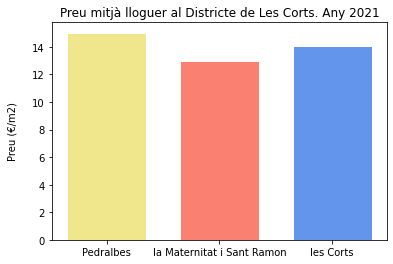

In [20]:
search = rent_m2_df['Nom_Districte'] == 'Les Corts'
rent_m2_lescorts_df = rent_m2_df[search]

lescorts_preu = rent_m2_lescorts_df.groupby('Nom_Barri').mean()['Preu'].values
lescorts_barri = rent_m2_lescorts_df.groupby('Nom_Barri').mean()['Preu'].index

# plot
fig, ax = plt.subplots()

ax.bar(lescorts_barri, lescorts_preu, width=0.7, color=['khaki', 'salmon', 'cornflowerblue'], edgecolor="white")
ax.set_ylabel('Preu (€/m2)', rotation=90, fontsize=10, labelpad=15)
#ax.set(ylim=(600, 1800))

#labels = ['1', '2', '3', '4']

#ax.set_xticklabels(labels)

plt.title('Preu mitjà lloguer al Districte de Les Corts. Any 2021')

file = plot_path / str('Fig07_Lloguer_m2_Les Corts')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

---
**5. Evolució del preu mitjà i la mediana per a tota Barcelona durant l'any 2021**

Fins ara estàvem considerant els preus per a tots els trimestres de l'any 2021, això ens permetia una certa homogeneització davant les fluctuacions estacionals dels preus del lloguer però durant el 2021 es podria apreciar un increment del preu amb una baixada puntual en el segon trimestre, potser degut a motius estacionals.

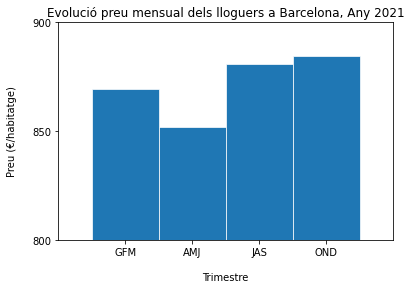

In [21]:
# Dues variables numèriques

# plot
rent_mean_tri = rent_house_df.groupby('Trimestre').mean()['Preu']

fig, ax = plt.subplots()

ax.bar([0, 1, 2, 3], rent_mean_tri.values, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(-1, 4), xticks=[0, 1, 2, 3],
       ylim=(800, 900), yticks=[800, 850, 900])
ax.set_ylabel('Preu (€/habitatge)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)

plt.title('Evolució preu mensual dels lloguers a Barcelona, Any 2021')

file = plot_path / str('Fig08_Evolució_Habitatges')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

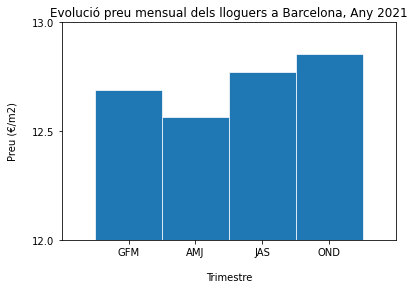

In [22]:
rent_mean_tri = rent_m2_df.groupby('Trimestre').mean()['Preu']

fig, ax = plt.subplots()

ax.bar([0, 1, 2, 3], rent_mean_tri.values, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(-1, 4), xticks=[0, 1, 2, 3],
       ylim=(12, 13), yticks=[12, 12.5, 13])

ax.set_ylabel('Preu (€/m2)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)

plt.title('Evolució preu mensual dels lloguers a Barcelona, Any 2021')

file = plot_path / str('Fig09_Evolució_Habitatge')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

---
**6. Evolució dels preus mitjans dels lloguers al llarg del 2021 per districtes**

També podem representar la evolució dels lloguers durant el 2021 per a cada un dels districtes. On s'observa un increment en tots els districtes excepte en Sant Andreu i Nous Barris.

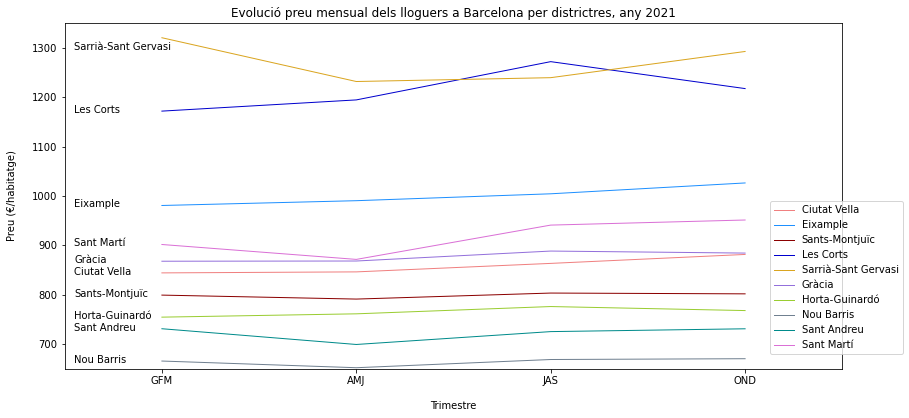

In [23]:
# Tres variables

annotate_displace = [0, 0, 0, 0, -20, 0, 0, 0, 0, 0]

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
colors = ['lightcoral', 'dodgerblue', 'darkred', 'mediumblue', 'goldenrod', 'mediumpurple', 'yellowgreen',
          'slategrey', 'darkcyan', 'orchid']

plt.subplots_adjust(left=-0.3, right=0.9, top=0.9, bottom=0.1)

for i in range(len(districtes)):
    districte = districtes[i]
    search = rent_house_df['Nom_Districte'] == districte
    subset = rent_house_df[search]
    subset_tri = subset.groupby('Trimestre').mean()['Preu']

    ax.annotate(districtes[i], xy=(0.55, subset_tri.values[0] + annotate_displace[i]), xytext=(0, 1), textcoords='offset points',
                                    horizontalalignment='left', verticalalignment='center', size=10)
    plt.plot(subset_tri.index, subset_tri.values, color=colors[i], ls='-', lw=1, label=districte)
    
ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
       ylim=(650, 1350), yticks= [700, 800, 900, 1000, 1100, 1200, 1300])

ax.set_ylabel('Preu (€/habitatge)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=([0.9, 0.5, 0, 0]))

plt.title('Evolució preu mensual dels lloguers a Barcelona per districtres, any 2021')

file = plot_path / str('Fig10_Evolució_Districtes_Habitatge')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

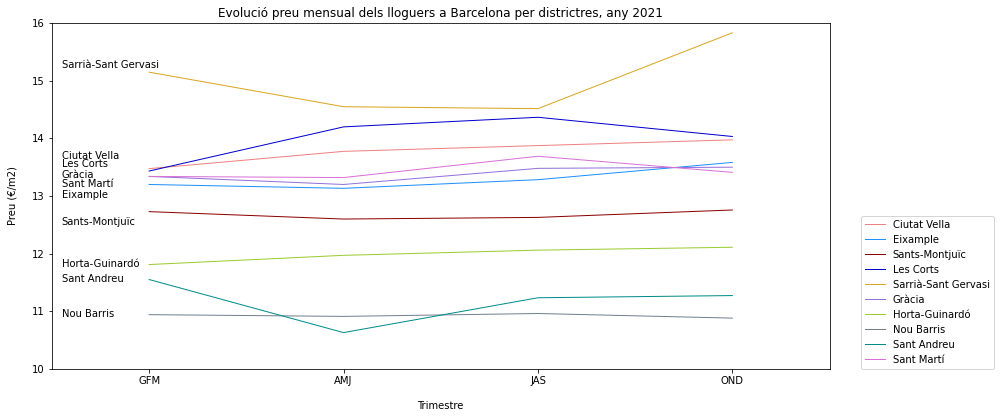

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
districtes = rent_df['Nom_Districte'].unique()

plt.subplots_adjust(left=-0.3, right=0.9, top=0.9, bottom=0.1)

annotate_displace = [0.2, -0.2, -0.2, 0.1, 0.1, 0, 0, 0, 0, -0.15]

for i in range(len(districtes)):
    districte = districtes[i]
    search = rent_m2_df['Nom_Districte'] == districte
    subset = rent_m2_df[search]
    subset_tri = subset.groupby('Trimestre').mean()['Preu']
    ax.annotate(districtes[i], xy=(0.55, subset_tri.values[0] + annotate_displace[i]), xytext=(0, 1), textcoords='offset points',
                                    horizontalalignment='left', verticalalignment='center', size=10)
    plt.plot(subset_tri.index, subset_tri.values, color=colors[i], ls='-', lw=1, label=districte)
    
#ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
#       ylim=(10, 16), yticks= [np.arange(10, 16, 1)])

ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
       ylim=(10, 16), yticks= [10, 11, 12, 13, 14, 15, 16])

ax.set_ylabel('Preu (€/m2)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)
plt.legend(loc=(1.04, 0))
plt.title('Evolució preu mensual dels lloguers a Barcelona per districtres, any 2021')

file = plot_path / str('Fig11_Evolució_Districtes_m2')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

---
### Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

**7. Evolució dels preus mitjans dels lloguers al llarg del 2021 per barris ressaltant els barris on més baixen els preus**

Fem el mateix gràfic d'abans però per barris i ressaltarem aquells on més han baixat i on han pujat més els preus.

In [25]:

barris = rent_df['Nom_Barri'].unique()
cheaper = []
for barri in barris:
    search = rent_house_df['Nom_Barri'] == barri
    rent_1st = rent_house_df[search]['Preu'].values[0]
    rent_4st = rent_house_df[search]['Preu'].values[3]
    if rent_4st < rent_1st:
        cheaper.append(1)
    else:
        cheaper.append(0)

In [26]:
barris = rent_df['Nom_Barri'].unique()
change = []
for barri in barris:
    isnan = 0
    search = rent_house_df['Nom_Barri'] == barri
    for i in range(0, 3):
        if np.isnan(rent_house_df[search]['Preu'].values[i]):
            isnan = 1
    if isnan == 0:
        search = rent_house_df['Nom_Barri'] == barri
        rent_1st = rent_house_df[search]['Preu'].values[0]
        rent_4st = rent_house_df[search]['Preu'].values[3]
        change.append(rent_4st - rent_1st)
    else:
        change.append(np.nan)
    
sorted_change = sorted(change)
pos_sorted_change = [sorted_change.index(x) for x in change]

És molt notable la baixada tan pronunciada que ocorre a Vallvidrera, el Tibidado i les Planes, que a més, és un dels barris més cars. En aquest cas, al ser un barri que inclou urbanitzacions amb xalets amb lloguers elevats, el lloguer pot ser més irregulars que en altres llocs de Barcelona.

la Marina de Port
Vallvidrera, el Tibidabo i les Planes
Sant Gervasi - la Bonanova
Vallcarca i els Penitents
la Trinitat Nova


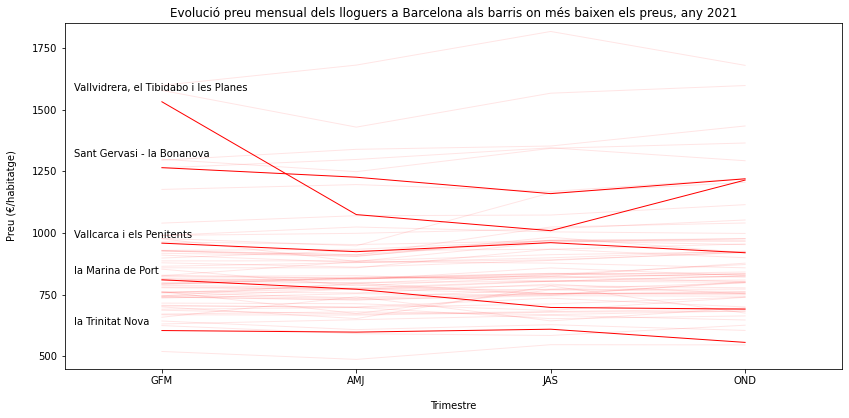

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
districtes = rent_df['Nom_Districte'].unique()

plt.subplots_adjust(left=-0.3, right=0.9, top=0.9, bottom=0.1)

annotate_displace = [30, 50, 50, 30, 30]
j = 0
for i in range(len(barris)):
    barri = barris[i]
    search = rent_house_df['Nom_Barri'] == barri
    subset = rent_house_df[search]
    subset_tri = subset.groupby('Trimestre').mean()['Preu']
    if (cheaper[i] == 1) & (pos_sorted_change[i] < 5):
        print(barri)
        ax.annotate(barri, xy=(0.55, subset_tri.values[0] + annotate_displace[j]), xytext=(0, 1), textcoords='offset points',
                                        horizontalalignment='left', verticalalignment='center', size=10)
        alpha = 1
        j += 1
    else:
        alpha = 0.1
    plt.plot(subset_tri.index, subset_tri.values, color='red', ls='-', lw=1, label=districte, alpha=alpha)
    
#ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
#       ylim=(10, 16), yticks= [np.arange(10, 16, 1)])

ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
       ylim=(450, 1850), yticks= [500, 750, 1000, 1250, 1500, 1750])

ax.set_ylabel('Preu (€/habitatge)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)
#plt.legend(loc=(1.04, 0))
plt.title('Evolució preu mensual dels lloguers a Barcelona als barris on més baixen els preus, any 2021')

file = plot_path / str('Fig11_Evolució_Districtes_m2')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

plt.show()

Es al Poble Nou on trobem alguns dels barris on més puja el preu. En aquesta zona s'està produïnt un canvi important d'algun dels barris, amb la transformació del teixit urbà, creació de llocs de treball i noves vivendes d'obra nova.

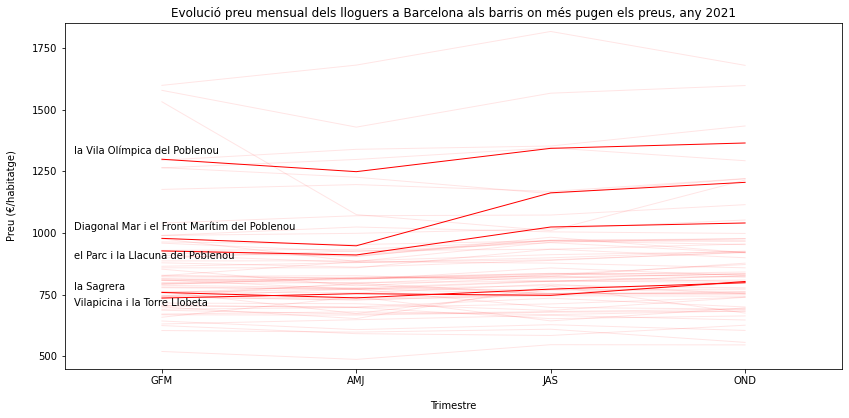

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
districtes = rent_df['Nom_Districte'].unique()

plt.subplots_adjust(left=-0.3, right=0.9, top=0.9, bottom=0.1)

annotate_displace = [-25, 20, -25, 30, 45]
j = 0
for i in range(len(barris)):
    barri = barris[i]
    search = rent_house_df['Nom_Barri'] == barri
    subset = rent_house_df[search]
    subset_tri = subset.groupby('Trimestre').mean()['Preu']
    if (cheaper[i] == 0) & (pos_sorted_change[i] > 63):
        ax.annotate(barri, xy=(0.55, subset_tri.values[0] + annotate_displace[j]), xytext=(0, 1), textcoords='offset points',
                                        horizontalalignment='left', verticalalignment='center', size=10)
        alpha = 1
        j += 1
    else:
        alpha = 0.1
    plt.plot(subset_tri.index, subset_tri.values, color='red', ls='-', lw=1, label=districte, alpha=alpha)
    
#ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
#       ylim=(10, 16), yticks= [np.arange(10, 16, 1)])

ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
       ylim=(450, 1850), yticks= [500, 750, 1000, 1250, 1500, 1750])

ax.set_ylabel('Preu (€/habitatge)', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

labels = ['GFM', 'AMJ', 'JAS', 'OND']

ax.set_xticklabels(labels)
#plt.legend(loc=(1.04, 0))
plt.title('Evolució preu mensual dels lloguers a Barcelona als barris on més pugen els preus, any 2021')

file = plot_path / str('Fig11_Evolució_Districtes_m2')
plt.savefig(file, dpi=400, pad_inches=0.1,
            bbox_inches='tight')

plt.show()